In [1]:
import os
if os.path.exists("/gss_gpfs_scratch/"):
    RMG_PY_PATH = os.path.expanduser('/gss_gpfs_scratch/westgroup/Importer/RMG-Py/')
    RMG_MODELS_PATH = os.path.expanduser('/gss_gpfs_scratch/westgroup/Importer/RMG-models')
else:
    RMG_PY_PATH = os.path.expanduser('~/Code/RMG-Py/')
    RMG_MODELS_PATH = os.path.expanduser('~/Code/RMG-models')

In [2]:
import IPython
from IPython.display import display
import sys
import os
import re

sys.path.insert(1,RMG_PY_PATH) # a copy of RMG-Py on the `importer` branch.
from rmgpy.molecule import Molecule
import rmgpy.kinetics
import numpy
import cPickle as pickle
from collections import Counter, defaultdict
from rmgpy.reaction import Reaction
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import rmgpy.rmg
import rmgpy.data
import rmgpy.data.kinetics
import ck2cti

# This is an ipython notebook to process the results from running `sarathy_comparison.py` and `heptane_comparison.py`

### This is importing the ignition delays

In [3]:
f = open("../reference_files/ignition_delay_heptane.pkl", "r")
heptane_data = pickle.load(f)

g = open("../reference_files/ignition_delay_sarathy.pkl", "r")
sarathy_data = pickle.load(g)

### This is getting the species dictionaries for each model

In [4]:
master = 'CombFlame2012/2028-Sarathy'
# Find and read the chemkin file
with open(os.path.join(RMG_MODELS_PATH, master,'import.sh')) as infile:
    shellscript = infile.read()
reactions_filename = re.search('--reactions\s+(\S+)',shellscript).group(1)
reactions_filepath = os.path.join(RMG_MODELS_PATH,master,reactions_filename)
thermo_filename = re.search('--thermo\s+(\S+)',shellscript).group(1)
thermo_filepath = os.path.join(RMG_MODELS_PATH,master,thermo_filename)
print(reactions_filepath)
print(thermo_filepath)
with open(reactions_filepath) as infile:
    chemkin = infile.readlines()
#for i,line in enumerate(chemkin):
    #print i, line.strip()             # uncomment to print the chemkin model
    
print "".join(chemkin[:4]) # print first 4 lines only

sarathy_parser = ck2cti.Parser()
surfaces = sarathy_parser.convertMech(inputFile=reactions_filepath,
                              thermoFile=thermo_filepath,
                              transportFile=None,
                              surfaceFile=None,
                              phaseName=None,
                              outName='sarathy_master.cti',
                              permissive=True)
sarathy_parser.reactions[0]

dict_path = os.path.join(RMG_MODELS_PATH, master, 'RMG-Py-kinetics-library', 'dictionary.txt')
print "Loading species_dict from",dict_path
sarathy_dict = rmgpy.data.kinetics.KineticsLibrary().getSpecies(dict_path)

oh*<=>oh+hv                                  1.450e+06      0.0           0.0
If the "--permissive" option was specified, this will be converted to an irreversible reaction with the photon removed.
ch*<=>ch+hv 1.860e+06 0.0 0.0
If the "--permissive" option was specified, this will be converted to an irreversible reaction with the photon removed.


/Users/nathan/Code/RMG-models/CombFlame2012/2028-Sarathy/model.txt
/Users/nathan/Code/RMG-models/CombFlame2012/2028-Sarathy/thermo.txt
!A comprehensive chemical kinetic combustion model for the four butanol isomers
!S.M. Sarathy, S. Vranckx, K. Yasunaga, M. Mehl, P. O�wald, W.K. Metcalfe,
!C. K. Westbrook, W.J. Pitz, K. Kohse-Hoinghaus, R.X. Fernandes, H.J Curran
!  Accepted Combustion and Flame, Dec 2011



INFO:root:Skipping unexpected species "hoco" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "ch3cho2h" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "ch3coch2o2h" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "ch3coch2o" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "ch3chcho" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "c3h2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "c5h11-1" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "c5h11-2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "c5h11-3" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "c5h10-1" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "c5h10-2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "c5h81-3" while reading thermodynami

Wrote CTI mechanism file to 'sarathy_master.cti'.
Mechanism contains 431 species and 2346 reactions.
Loading species_dict from /Users/nathan/Code/RMG-models/CombFlame2012/2028-Sarathy/RMG-Py-kinetics-library/dictionary.txt


In [5]:
master = 'n-Heptane'
# Find and read the chemkin file
with open(os.path.join(RMG_MODELS_PATH, master,'import.sh')) as infile:
    shellscript = infile.read()
reactions_filename = re.search('--reactions\s+(\S+)',shellscript).group(1)
reactions_filepath = os.path.join(RMG_MODELS_PATH,master,reactions_filename)
thermo_filename = re.search('--thermo\s+(\S+)',shellscript).group(1)
thermo_filepath = os.path.join(RMG_MODELS_PATH,master,thermo_filename)
print(reactions_filepath)
print(thermo_filepath)
with open(reactions_filepath) as infile:
    chemkin = infile.readlines()
#for i,line in enumerate(chemkin):
    #print i, line.strip()             # uncomment to print the chemkin model
    
print "".join(chemkin[:4]) # print first 4 lines only

heptane_parser = ck2cti.Parser()
surfaces = heptane_parser.convertMech(inputFile=reactions_filepath,
                              thermoFile=thermo_filepath,
                              transportFile=None,
                              surfaceFile=None,
                              phaseName=None,
                              outName='sarathy_master.cti',
                              permissive=True)


dict_path = os.path.join(RMG_MODELS_PATH, master, 'RMG-Py-kinetics-library', 'dictionary.txt')
print "Loading species_dict from",dict_path
heptane_dict = rmgpy.data.kinetics.KineticsLibrary().getSpecies(dict_path)


/Users/nathan/Code/RMG-models/n-Heptane/nc7_ver3.1_mech.txt
/Users/nathan/Code/RMG-models/n-Heptane/n_heptane_v3.1_therm.dat
!n-heptane mechanism ver. 3.1 2012-03-30
!M. Mehl, W. J. Pitz, C. K. Westbrook and H. J. Curran, "Kinetic Modeling of Gasoline Surrogate Components and Mixtures under Engine Conditions," Proc. Combust. Inst.  33 (1) (2011) 193-200.
!LLNL-MI-536391
!March 2012: Multiplied the A-factors of the molecular elimination of HO2 from heptyl-O2 by a factor of 2. The previous version reported lower values doe to a clerical error in the uploaded file.



INFO:root:Skipping unexpected species "HOCO" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CH3CHO2H" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CH3CHCHO" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C3H51-2V3OOH" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C3H52-1V3OOH" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "IC5H12" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "AC5H11" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "BC5H11" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CC5H11" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "DC5H11" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "AC5H10" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "BC5H10" while reading thermodynami

Wrote CTI mechanism file to 'sarathy_master.cti'.
Mechanism contains 654 species and 4846 reactions.
Loading species_dict from /Users/nathan/Code/RMG-models/n-Heptane/RMG-Py-kinetics-library/dictionary.txt


In [6]:
def get_significant_reactions(df):
    """
    A function designed to take the above dataframes and identify the significant reactions.
    """
    return df.T[(((df.T - df.T.mean()) / (df.T.std())) > 3).T.any()]   

### Printing out the indicies of the significant reactions

In [7]:
important_sarathy_reactions = {}
print "Sarathy significant reactions:"
for reaction_index in get_significant_reactions(sarathy_data).index: 
    print reaction_index
    try:
        rxn = sarathy_parser.reactions[int(reaction_index)]
        r1, r2 = rxn.reactants
        p1, p2 = rxn.products
        s1 = r1[1]
        s2 = r2[1]
        s3 = p1[1]
        s4 = p2[1]
        
        important_sarathy_reactions[reaction_index] = Reaction(
            reactants = [sarathy_dict[s1.label], sarathy_dict[s2.label]], 
            products= [sarathy_dict[s3.label], sarathy_dict[s4.label]],
            reversible = True)
    except:
        continue
    
print
print "#####"
print 
important_heptane_reactions = {}

print "Heptane significant reactions:"
for reaction_index in get_significant_reactions(heptane_data).index:
    print reaction_index
    try:
        rxn = heptane_parser.reactions[int(reaction_index)]
        r1, r2 = rxn.reactants
        p1, p2 = rxn.products
        s1 = r1[1]
        s2 = r2[1]
        s3 = p1[1]
        s4 = p2[1]

        important_heptane_reactions[reaction_index] = Reaction(
            reactants = [heptane_dict[s1.label], heptane_dict[s2.label]], 
            products= [heptane_dict[s3.label], heptane_dict[s4.label]],
            reversible = True) 
    except:
        print "Issue converting reaction {} into RMG reaction.".format(reaction_index)
        continue

Sarathy significant reactions:
77
1567

#####

Heptane significant reactions:
86
3626
3624
3622


In [8]:
# Viewing the significant reactions for both models
important_sarathy_reactions, important_heptane_reactions

({'1567': Reaction(reactants=[Species(label="nc4h9oh", molecule=[Molecule(SMILES="CCCCO")]), Species(label="ho2", molecule=[Molecule(SMILES="[O]O")])], products=[Species(label="pc4h9o", molecule=[Molecule(SMILES="CCCC[O]")]), Species(label="h2o2", molecule=[Molecule(SMILES="OO")])])},
 {'3622': Reaction(reactants=[Species(label="C7H15-2", molecule=[Molecule(SMILES="C[CH]CCCCC")]), Species(label="H2O2", molecule=[Molecule(SMILES="OO")])], products=[Species(label="NC7H16", molecule=[Molecule(SMILES="CCCCCCC")]), Species(label="HO2", molecule=[Molecule(SMILES="[O]O")])]),
  '3624': Reaction(reactants=[Species(label="C7H15-3", molecule=[Molecule(SMILES="CC[CH]CCCC")]), Species(label="H2O2", molecule=[Molecule(SMILES="OO")])], products=[Species(label="NC7H16", molecule=[Molecule(SMILES="CCCCCCC")]), Species(label="HO2", molecule=[Molecule(SMILES="[O]O")])]),
  '3626': Reaction(reactants=[Species(label="C7H15-4", molecule=[Molecule(SMILES="CCC[CH]CCC")]), Species(label="H2O2", molecule=[Mole

### Importing the importer kinetics (need to remake this pickle file)

In [9]:
h = open("../reference_files/importerKinetics.pkl", "r")
importer_kinetics = pickle.load(h)
importer_kinetics = pd.DataFrame(importer_kinetics)
importer_kinetics

,C*C*CC + C#CC. <=> CC#CC. + C#CC,O2 + NC4-OQOOH => CH2CO + CH3CHO + OH + HO2,O2 + C2H5 => CH2O + CH3O,C3H3 + C3H8 => AC3H4 + NC3H7,h2c4o + oh <=> ch2co + hcco,OH + C2H2 => CH2CHO,C2H5CHO + C4H7 <=> C2H5CO + C4H8-2,c4h8o1-2 + oh => ch2o + c3h5-a + h2o,CH3OCHO <=> CH3 + CO2 + H,c4h8o1-2 + o => ch2o + c3h5-a + oh,...,tc4h8cho + o2 <=> o2c4h8cho,C3H3 + CH <=> C4H2 + H + H,HCO3 + C3H6 => HCO3H + CH2CHCH2,o2c4h8cho <=> o2hc4h8co,ic4h8o2h-t + co <=> o2hc4h8co,c3h5-a + c2h5 <=> c2h4 + c3h6,C2H5OO + CO => CO2 + CH3 + CH2O,c2h5coch3 + c2h5 <=> c2h5coch2 + c2h6,ic4h7o + ic4h8 <=> ic4h7oh + ic4h7,ic4h6oh + ho2 => ch2cch2oh + ch2o + oh
AramcoMech_1.3,NaN,NaN,NaN,NaN,"Arrhenius(A=(1e+07,'cm^3/(mol*s)'), n=2, Ea=(2...",NaN,NaN,"Arrhenius(A=(5e+12,'cm^3/(mol*s)'), n=0, Ea=(0...",NaN,"Arrhenius(A=(5e+12,'cm^3/(mol*s)'), n=0, Ea=(0...",...,"Arrhenius(A=(2e+12,'cm^3/(mol*s)'), n=0, Ea=(0...",NaN,NaN,"Arrhenius(A=(2.16e+11,'s^-1'), n=0, Ea=(15360,...","Arrhenius(A=(1.5e+11,'cm^3/(mol*s)'), n=0, Ea=...","Arrhenius(A=(4e+11,'cm^3/(mol*s)'), n=0, Ea=(0...",NaN,"Arrhenius(A=(5e+10,'cm^3/(mol*s)'), n=0, Ea=(1...","Arrhenius(A=(2.7e+11,'cm^3/(mol*s)'), n=0, Ea=...","Arrhenius(A=(1.446e+13,'cm^3/(mol*s)'), n=0, E..."
AramcoMech_2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Arrhenius(A=(2e+12,'cm^3/(mol*s)'), n=0, Ea=(0...",NaN,NaN,"Arrhenius(A=(2.16e+11,'s^-1'), n=0, Ea=(15360,...","Arrhenius(A=(1.5e+11,'cm^3/(mol*s)'), n=0, Ea=...","Arrhenius(A=(4e+11,'cm^3/(mol*s)'), n=0, Ea=(0...",NaN,"Arrhenius(A=(5e+10,'cm^3/(mol*s)'), n=0, Ea=(1...","Arrhenius(A=(2.7e+11,'cm^3/(mol*s)'), n=0, Ea=...","Arrhenius(A=(1.446e+13,'cm^3/(mol*s)'), n=0, E..."
AutoTST-OOHabstraction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Biomass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chernov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Arrhenius(A=(2.6e+12,'cm^3/(mol*s)'), n=0, Ea=...",NaN,NaN,NaN,NaN
CombFlame2012/2028-Sarathy,NaN,NaN,NaN,NaN,"Arrhenius(A=(1e+07,'cm^3/(mol*s)'), n=2, Ea=(2...",NaN,NaN,"Arrhenius(A=(5e+12,'cm^3/(mol*s)'), n=0, Ea=(0...",NaN,"Arrhenius(A=(5e+12,'cm^3/(mol*s)'), n=0, Ea=(0...",...,"Arrhenius(A=(2e+12,'cm^3/(mol*s)'), n=0, Ea=(0...",NaN,NaN,"Arrhenius(A=(2.16e+11,'s^-1'), n=0, Ea=(15360,...","Arrhenius(A=(1.5e+11,'cm^3/(mol*s)'), n=0, Ea=...","Arrhenius(A=(4e+11,'cm^3/(mol*s)'), n=0, Ea=(0...",NaN,"Arrhenius(A=(5e+10,'cm^3/(mol*s)'), n=0, Ea=(1...","Arrhenius(A=(2.7e+11,'cm^3/(mol*s)'), n=0, Ea=...","Arrhenius(A=(1.446e+13,'cm^3/(mol*s)'), n=0, E..."
CombFlame2013/1315-Chang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CombFlame2013/1541-Zhang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arrhenius(A=(5e+12,'cm^3/(mol*s)'), n=0, Ea=(0...",NaN,"Arrhenius(A=(5e+12,'cm^3/(mol*s)'), n=0, Ea=(0...",...,NaN,NaN,NaN,NaN,NaN,"Arrhenius(A=(4e+11,'cm^3/(mol*s)'), n=0, Ea=(0...",NaN,"Arrhenius(A=(5e+10,'cm^3/(mol*s)'), n=0, Ea=(1...","Arrhenius(A=(2.7e+11,'cm^3/(mol*s)'), n=0, Ea=...","Arrhenius(A=(1.446e+13,'cm^3/(mol*s)'), n=0, E..."
CombFlame2013/1609-Veloo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CombFlame2013/17-Malewicki,NaN,NaN,NaN,NaN,"Arrhenius(A=(1e+07,'cm^3/(mol*s)'), n=2, Ea=(2...",NaN,NaN,"Arrhenius(A=(5e+12,'cm^3/(mol*s)'), n=0, Ea=(0...",NaN,"Arrhenius(A=(5e+12,'cm^3/(mol*s)'), n=0, Ea=(0...",...,NaN,NaN,NaN,NaN,NaN,"Arrhenius(A=(4e+11,'cm^3/(mol*s)'), n=0, Ea=(0...",NaN,"Arrhenius(A=(5e+10,'cm^3/(mol*s)'), n=0, Ea=(1...",NaN,NaN


### Getting the list of autoTST OOH reactions

In [10]:
f = open("../../autotst_kinetics.pkl","r")
autotst_kinetics = pickle.load(f)
ooh_reactions = []
for rxn in autotst_kinetics:
    reactants, products = rxn.label.split("_")
    r1, r2 = reactants.split('+')
    p1, p2 = products.split('+')
    if "OO" in [r1, r2, p1, p2] and "[O]O" in [r1, r2, p1, p2]:
        #print [r1, r2, p1, p2]
        ooh_reactions.append(rxn)

### Creating nickname dictionaries 

In [11]:
sarathy_smiles_to_nickname_dict = {}
for species in sarathy_dict.itervalues():
    #print len(species.molecule[0].toSMILES())
    for mol in species.molecule:
        sarathy_smiles_to_nickname_dict[mol.toSMILES()] = species.label
    

heptane_smiles_to_nickname_dict = {}
for species in heptane_dict.itervalues():
    #print len(species.molecule[0].toSMILES())
    for mol in species.molecule:
        heptane_smiles_to_nickname_dict[mol.toSMILES()] = species.label
    
print "Dictionaries created"

Dictionaries created


In [12]:
import itertools
sarathy_rxns = []
for sarathy_reaction in important_sarathy_reactions.values():
    
    reactants = [n.molecule[-1].toSMILES() for n in sarathy_reaction.reactants]
    products = [n.molecule[-1].toSMILES() for n in sarathy_reaction.products]

    joined_reactant_orders = ['+'.join(order) for order in itertools.permutations(reactants)]
    joined_product_orders = ['+'.join(order) for order in itertools.permutations(products)]
    possible_labels = ['_'.join((joined_r, joined_p)) for joined_r in joined_reactant_orders for joined_p in joined_product_orders]
    
    
    for ooh_reaction in ooh_reactions:
        if ooh_reaction.label in possible_labels:
            ooh_reactants, ooh_products = ooh_reaction.label.split("_")
            r1, r2 = ooh_reactants.split("+")
            p1, p2 = ooh_products.split("+")
            ooh_smiles = [r1, r2, p1, p2]

            inchikey_to_smiles_dict = {}
            for smiles in ooh_smiles:
                inchikey_to_smiles_dict[Molecule(SMILES=smiles).toInChIKey()] = smiles
        
    
            for reactant in ooh_reaction.reactants:
                inchi_key = reactant.label.split("-u")[0]
                if not reactant.label in sarathy_smiles_to_nickname_dict.itervalues():
                    reactant.molecule = [Molecule(SMILES=inchikey_to_smiles_dict[inchi_key])]
                    reactant.label = sarathy_smiles_to_nickname_dict[inchikey_to_smiles_dict[inchi_key]]
                
                
            for product in ooh_reaction.products:
                inchi_key = product.label.split("-u")[0]
                if not product.label in sarathy_smiles_to_nickname_dict.itervalues():
                    product.molecule = [Molecule(SMILES=inchikey_to_smiles_dict[inchi_key])]
                    product.label = sarathy_smiles_to_nickname_dict[inchikey_to_smiles_dict[inchi_key]]
                
                
            
            sarathy_rxns.append([sarathy_reaction, ooh_reaction])#, reaction.toChemkin(), reaction.toCantera()])
        
sarathy_df = pd.DataFrame(sarathy_rxns)

sarathy_df.columns = ["Importer Reaction", "AutoTST Reaction"]#, "AutoTST Reaction - Chemkin" , "AutoTST - Cantera"]

sarathy_df


,Importer Reaction,AutoTST Reaction
0,nc4h9oh + ho2 <=> pc4h9o + h2o2,nc4h9oh + ho2 <=> pc4h9o + h2o2


In [13]:
import itertools
heptane_rxns = []
for heptane_reaction in important_heptane_reactions.values():
    
    reactants = [n.molecule[-1].toSMILES() for n in heptane_reaction.reactants]
    products = [n.molecule[-1].toSMILES() for n in heptane_reaction.products]

    joined_reactant_orders = ['+'.join(order) for order in itertools.permutations(reactants)]
    joined_product_orders = ['+'.join(order) for order in itertools.permutations(products)]
    possible_labels = ['_'.join((joined_r, joined_p)) for joined_r in joined_reactant_orders for joined_p in joined_product_orders]
    
    
    for ooh_reaction in ooh_reactions:
        if ooh_reaction.label in possible_labels:
            ooh_reactants, ooh_products = ooh_reaction.label.split("_")
            r1, r2 = ooh_reactants.split("+")
            p1, p2 = ooh_products.split("+")
            ooh_smiles = [r1, r2, p1, p2]

            inchikey_to_smiles_dict = {}
            for smiles in ooh_smiles:
                inchikey_to_smiles_dict[Molecule(SMILES=smiles).toInChIKey()] = smiles
        
    
            for reactant in ooh_reaction.reactants:
                inchi_key = reactant.label.split("-u")[0]
                if not reactant.label in heptane_smiles_to_nickname_dict.itervalues():
                    reactant.molecule = [Molecule(SMILES=inchikey_to_smiles_dict[inchi_key])]
                    reactant.label = heptane_smiles_to_nickname_dict[inchikey_to_smiles_dict[inchi_key]]
                
                
            for product in ooh_reaction.products:
                inchi_key = product.label.split("-u")[0]
                if not product.label in heptane_smiles_to_nickname_dict.itervalues():
                    product.molecule = [Molecule(SMILES=inchikey_to_smiles_dict[inchi_key])]
                    product.label = heptane_smiles_to_nickname_dict[inchikey_to_smiles_dict[inchi_key]]
                
                
            
            heptane_rxns.append([heptane_reaction, ooh_reaction])#, reaction.toChemkin(), reaction.toCantera()])
        
heptane_df = pd.DataFrame(heptane_rxns)

heptane_df.columns = ["Importer Reaction", "AutoTST Reaction"]#, "AutoTST Reaction - Chemkin" , "AutoTST - Cantera"]

heptane_df


,Importer Reaction,AutoTST Reaction
0,C7H15-2 + H2O2 <=> NC7H16 + HO2,C7H15-2 + H2O2 <=> NC7H16 + HO2
1,HCO + H2O2 <=> CH2O + HO2,HCO + H2O2 <=> CH2O + HO2
2,C7H15-3 + H2O2 <=> NC7H16 + HO2,C7H15-3 + H2O2 <=> NC7H16 + HO2
3,C7H15-4 + H2O2 <=> NC7H16 + HO2,C7H15-4 + H2O2 <=> HO2 + NC7H16


In [14]:
reactions_df = pd.concat([sarathy_df, heptane_df])
reactions_df

,Importer Reaction,AutoTST Reaction
0,nc4h9oh + ho2 <=> pc4h9o + h2o2,nc4h9oh + ho2 <=> pc4h9o + h2o2
0,C7H15-2 + H2O2 <=> NC7H16 + HO2,C7H15-2 + H2O2 <=> NC7H16 + HO2
1,HCO + H2O2 <=> CH2O + HO2,HCO + H2O2 <=> CH2O + HO2
2,C7H15-3 + H2O2 <=> NC7H16 + HO2,C7H15-3 + H2O2 <=> NC7H16 + HO2
3,C7H15-4 + H2O2 <=> NC7H16 + HO2,C7H15-4 + H2O2 <=> HO2 + NC7H16


### Plotting the results

CombFlame2012/2028-Sarathy    Arrhenius(A=(6.47e-07,'cm^3/(mol*s)'), n=5.3, ...
CombFlame2013/1939-Cai        Arrhenius(A=(6.47e-07,'cm^3/(mol*s)'), n=5.3, ...
CombFlame2014/657-Jin         Arrhenius(A=(6.47e-07,'cm^3/(mol*s)'), n=5.3, ...
PCI2013/289-Dagaut            Arrhenius(A=(37710,'cm^3/(mol*s)'), n=2, Ea=(1...
PCI2017/087-Tran              Arrhenius(A=(6.47e-07,'cm^3/(mol*s)'), n=5.3, ...
AutoTST                       Arrhenius(A=(0.0574127,'cm^3/(mol*s)'), n=3.95...
Name: nc4h9oh + ho2 <=> pc4h9o + h2o2, dtype: object

CCCCO+[O]O_CCCC[O]+OO


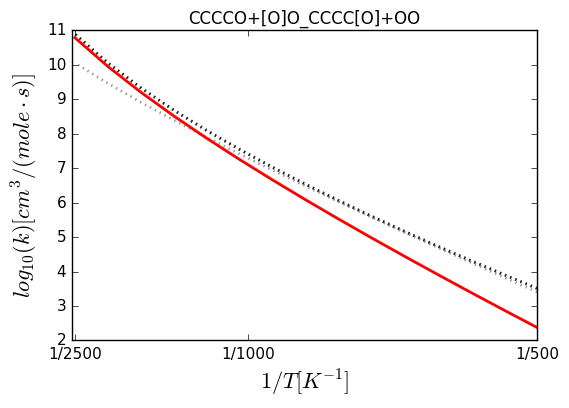

AramcoMech_1.3                          Arrhenius(A=(18800,'cm^3/(mol*s)'), n=2.7, Ea=...
AramcoMech_2.0                          Arrhenius(A=(18800,'cm^3/(mol*s)'), n=2.7, Ea=...
AutoTST-OOHabstraction                  Arrhenius(A=(4.23547e-06,'cm^3/(mol*s)'), n=5....
Chernov                                 Arrhenius(A=(3.01e+12,'cm^3/(mol*s)'), n=0, Ea...
CombFlame2012/2028-Sarathy              Arrhenius(A=(18800,'cm^3/(mol*s)'), n=2.7, Ea=...
CombFlame2013/1315-Chang                Arrhenius(A=(41100,'cm^3/(mol*s)'), n=2.5, Ea=...
CombFlame2013/1541-Zhang                Arrhenius(A=(0.0071,'cm^3/(mol*s)'), n=4.517, ...
CombFlame2013/17-Malewicki              Arrhenius(A=(41100,'cm^3/(mol*s)'), n=2.5, Ea=...
CombFlame2013/1939-Cai                  Arrhenius(A=(1e+12,'cm^3/(mol*s)'), n=0, Ea=(8...
CombFlame2013/1958-Zhao                 Arrhenius(A=(1e+12,'cm^3/(mol*s)'), n=0, Ea=(8...
CombFlame2013/2291-Somers               Arrhenius(A=(18800,'cm^3/(mol*s)'), n=2.7, Ea=...
CombFlame2

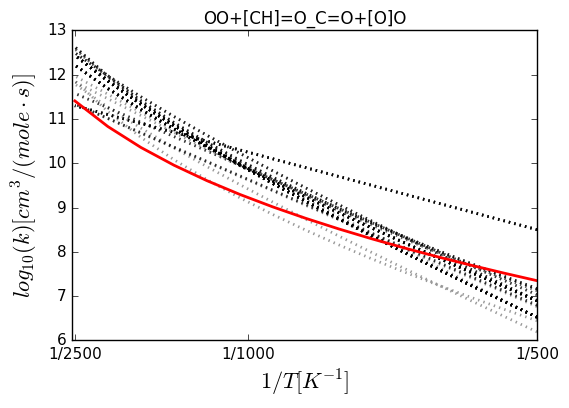

PCI2013/289-Dagaut      Arrhenius(A=(101000,'cm^3/(mol*s)'), n=2, Ea=(...
PCI2017/051-Pelucchi    Arrhenius(A=(101000,'cm^3/(mol*s)'), n=2, Ea=(...
PCI2017/052-Stagni      Arrhenius(A=(101000,'cm^3/(mol*s)'), n=2, Ea=(...
AutoTST                 Arrhenius(A=(9.59731e-06,'cm^3/(mol*s)'), n=4....
Name: HCO + H2O2 => CH2O + HO2, dtype: object

OO+[CH]=O_C=O+[O]O


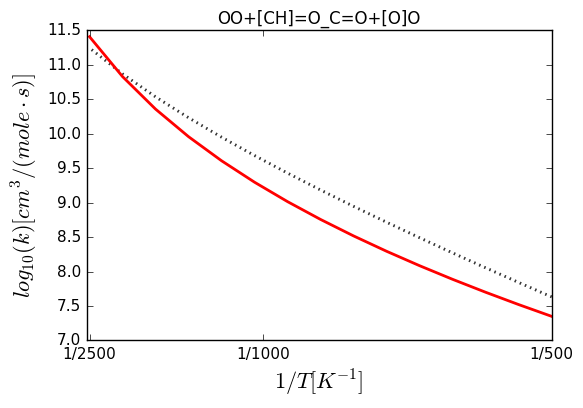

In [15]:
import numpy as np
inverseTemps = np.linspace(1000./500., 1000./2500., 15)
Temps = 1000./inverseTemps

comparisonPressure = 1e5 # Pa
for autotst_rxn in reactions_df["AutoTST Reaction"]:
        
    for i, reaction in enumerate(importer_kinetics.columns):
        if reaction.isIsomorphic(autotst_rxn):
            rxn_kinetics = importer_kinetics.iloc[:,i].dropna()

            rxn_kinetics["AutoTST"] = autotst_rxn.kinetics
            
            
            print rxn_kinetics
            print 
            
            
            fig, ax = plt.subplots()
            for index in rxn_kinetics.index:
                logk = []
                logkAutoTST = []
                kinetics = rxn_kinetics[index]

                if index == 'AutoTST':

                    for Temp in Temps:
                        k = kinetics.getRateCoefficient(T=Temp,P=comparisonPressure)
                        logkAutoTST.append(np.log10(k) + 6)

                    plt.plot(inverseTemps, logkAutoTST, '-r', linewidth=2)
                else:
                    for Temp in Temps:
                        k = kinetics.getRateCoefficient(T=Temp,P=comparisonPressure)
                        logk.append(np.log10(k) + 6)
                    plt.plot(inverseTemps, logk, ':k', linewidth=2, alpha=0.4)
            plt.xlabel("$1/T [K^{-1}]$", fontsize=16)
            plt.ylabel("$log_{10}(k) [cm^3 / (mole \cdot s)]$", fontsize=16)
            label = autotst_rxn.label

            Tticks = [500, 1000, 2500]
            ax.set_xticks([1000./T for T in Tticks])
            ax.set_xticklabels(['1/{:.0f}'.format(T) for T in Tticks])
            plt.tick_params(axis='x', labelsize=11)
            plt.tick_params(axis='y', labelsize=11)
            plt.title(label)
            plt.xlim([0.39,2])

            plt.ylim(max([ax.get_ylim()[0], 0]), min([ax.get_ylim()[1], 15]))
            #saveString = str(label) + '.pdf'
            #plt.savefig(saveString)
            print str(label)
            plt.show() 
    
